In [2]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bow = joblib.load(r'D:\FinalProject\DataBase\Output\Output For Modelling\bow')
x = joblib.load(r'D:\FinalProject\DataBase\Output\Output For Modelling\feature_extraction')
y = joblib.load(r'D:\FinalProject\DataBase\Output\Output For Modelling\sentiment')

In [3]:
plt.style.use('ggplot')

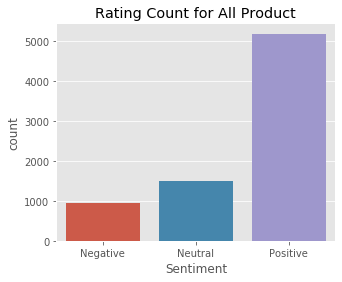


Percentage of Positive review: 12.55%
Percentage of Neutral review: 19.48%
Percentage of Negative review: 67.97%


In [8]:
plt.figure(figsize = (5,4))
sns.countplot(y)
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.title('Rating Count for All Product')
plt.xlabel('Sentiment')
plt.show() 
print(f'\nPercentage of Positive review: {round(y.value_counts().loc[-1]/len(y)*100, 2)}%')
print(f'Percentage of Neutral review: {round(y.value_counts().loc[0]/len(y)*100, 2)}%')
print(f'Percentage of Negative review: {round(y.value_counts().loc[1]/len(y)*100, 2)}%')

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)

# Baseline model with Machine Learning Algorithm

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

## 1. Multinominal Naive Bayes

In [11]:
mul_nb = MultinomialNB()
mul_nb.fit(x_train, y_train)
predict = mul_nb.predict(x_test)
print(classification_report(y_test, predict))
mul_nb_acc_train = round(mul_nb.score(x_train, y_train), 2)
mul_nb_acc_test = round(mul_nb.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       1.00      0.02      0.04       277
           0       0.36      0.01      0.02       423
           1       0.70      1.00      0.82      1591

    accuracy                           0.70      2291
   macro avg       0.69      0.34      0.29      2291
weighted avg       0.67      0.70      0.58      2291



## 2. Logistic Regression

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predict = logreg.predict(x_test)
print(classification_report(y_test, predict)) 
logreg_acc_train = round(logreg.score(x_train, y_train), 2)
logreg_acc_test = round(logreg.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.58      0.25      0.35       277
           0       0.37      0.16      0.22       423
           1       0.75      0.94      0.84      1591

    accuracy                           0.71      2291
   macro avg       0.57      0.45      0.47      2291
weighted avg       0.66      0.71      0.66      2291



## 3. K-Nearest Neighbors

In [13]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print(classification_report(y_test, predict))
knn_acc_train = round(knn.score(x_train, y_train), 2)
knn_acc_test = round(knn.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.25      0.00      0.01       277
           0       0.50      0.01      0.02       423
           1       0.70      1.00      0.82      1591

    accuracy                           0.70      2291
   macro avg       0.48      0.34      0.28      2291
weighted avg       0.61      0.70      0.58      2291



## 4. Stochastic Gradient Descend

In [14]:
sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)
predict = sgdc.predict(x_test)
print(classification_report(y_test, predict))
sgdc_acc_train = round(sgdc.score(x_train, y_train), 2)
sgdc_acc_test = round(sgdc.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.50      0.32      0.39       277
           0       0.37      0.17      0.23       423
           1       0.77      0.93      0.84      1591

    accuracy                           0.71      2291
   macro avg       0.55      0.47      0.49      2291
weighted avg       0.66      0.71      0.67      2291



## 5. Decision Tree

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predict = dtree.predict(x_test)
print(classification_report(y_test, predict))
dtree_acc_train = round(dtree.score(x_train, y_train), 2)
dtree_acc_test = round(dtree.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.30      0.25      0.27       277
           0       0.27      0.23      0.25       423
           1       0.75      0.80      0.78      1591

    accuracy                           0.63      2291
   macro avg       0.44      0.43      0.43      2291
weighted avg       0.61      0.63      0.62      2291



## 6. Random Forest

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
print(classification_report(y_test, predict))
rfc_acc_train = round(rfc.score(x_train, y_train), 2)
rfc_acc_test = round(rfc.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.68      0.13      0.22       277
           0       0.44      0.04      0.07       423
           1       0.71      0.99      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.61      0.39      0.37      2291
weighted avg       0.66      0.71      0.62      2291



In [17]:
print(classification_report(y_train, rfc.predict(x_train)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       681
           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00      3598

    accuracy                           1.00      5343
   macro avg       1.00      1.00      1.00      5343
weighted avg       1.00      1.00      1.00      5343



In [19]:
model = ['NBayes', 'LReg', 'KNN', 'SGD', 'DTree', 'RForest'] 
print('\nAccuracy for each model')
summary = pd.DataFrame({'Model': model, 
'train accuracy': [mul_nb_acc_train, logreg_acc_train, knn_acc_train, sgdc_acc_train, dtree_acc_train, rfc_acc_train],
'test accuracy': [mul_nb_acc_test, logreg_acc_test, knn_acc_test, sgdc_acc_test, dtree_acc_test, rfc_acc_test]})
summary


Accuracy for each model


,Model,train accuracy,test accuracy
0,NBayes,0.69,0.70
1,LReg,0.79,0.71
2,KNN,0.68,0.70
3,SGD,0.86,0.71
4,DTree,1.00,0.63
5,RForest,1.00,0.71


Conc: <br>
Model yang dipakai selanjutnya adalah Logistic Regression<br>
Karena model ini overfitting, maka yang akan dilakukan selanjutnya adalah reduce feature dan menambahkan training sample 


# PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=100)
x_pca = pca.fit_transform(x)

In [9]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 22)

Hasil reduce

In [10]:
logreg.fit(x_train_pca, y_train)
print('logistic regression with pca score (train): ' + str(round(logreg.score(x_train_pca, y_train), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test_pca, y_test), 2)))

logistic regression with pca score (train): 0.71
logistic regression with pca score (test): 0.71


In [48]:
print(classification_report(y_train, logreg.predict(x_train_pca)))

              precision    recall  f1-score   support

          -1       0.62      0.21      0.32       681
           0       0.52      0.14      0.22      1064
           1       0.72      0.97      0.83      3598

    accuracy                           0.71      5343
   macro avg       0.62      0.44      0.45      5343
weighted avg       0.67      0.71      0.64      5343



In [49]:
print(classification_report(y_test, logreg.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.51      0.22      0.30       277
           0       0.38      0.11      0.18       423
           1       0.74      0.95      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.54      0.43      0.44      2291
weighted avg       0.65      0.71      0.65      2291



# Oversampling with SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [22]:
y_train.value_counts()

 1    3598
 0    1064
-1     681
Name: positivity, dtype: int64

Oversampling

In [57]:
sm = SMOTE(sampling_strategy='minority')
oversampled_train_x, oversampled_train_y = sm.fit_sample(x_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_train_y), pd.DataFrame(oversampled_train_x)], axis = 1)

In [58]:
pd.Series(oversampled_train_y).value_counts()

-1    3598
 1    3598
 0    1064
Name: positivity, dtype: int64

In [59]:
logreg.fit(oversampled_train_x, oversampled_train_y)
print('logistic regression with pca score (train): ' + str(round(logreg.score(oversampled_train_x, oversampled_train_y), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test, y_test), 2)))

logistic regression with pca score (train): 0.92
logistic regression with pca score (test): 0.68


In [14]:
print(classification_report(oversampled_train_y, logreg.predict(oversampled_train_x)))

              precision    recall  f1-score   support

          -1       0.87      0.97      0.91      3598
           0       0.90      0.24      0.38      1064
           1       0.84      0.93      0.88      3598

    accuracy                           0.86      8260
   macro avg       0.87      0.71      0.72      8260
weighted avg       0.86      0.86      0.83      8260



In [13]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.38      0.63      0.48       277
           0       0.40      0.08      0.14       423
           1       0.80      0.88      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.53      0.53      0.48      2291
weighted avg       0.67      0.70      0.66      2291



Reduce + oversampled

In [60]:
sm = SMOTE(sampling_strategy='minority')
oversampled_train_x, oversampled_train_y = sm.fit_sample(x_train_pca, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_train_y), pd.DataFrame(oversampled_train_x)], axis = 1)

In [61]:
logreg.fit(oversampled_train_x, oversampled_train_y)
print('logistic regression with pca score (train): ' + str(round(logreg.score(oversampled_train_x, oversampled_train_y), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test_pca, y_test), 2)))

logistic regression with pca score (train): 0.71
logistic regression with pca score (test): 0.61


In [62]:
print(classification_report(oversampled_train_y, logreg.predict(oversampled_train_x)))

              precision    recall  f1-score   support

          -1       0.70      0.84      0.76      3598
           0       0.46      0.06      0.11      1064
           1       0.72      0.77      0.74      3598

    accuracy                           0.71      8260
   macro avg       0.63      0.56      0.54      8260
weighted avg       0.68      0.71      0.67      8260



In [63]:
print(classification_report(y_test, logreg.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.25      0.68      0.37       277
           0       0.36      0.06      0.10       423
           1       0.80      0.74      0.77      1591

    accuracy                           0.61      2291
   macro avg       0.47      0.49      0.41      2291
weighted avg       0.65      0.61      0.60      2291



Conc: baseline model with logistic regression + pca

# Tuning

with GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

In [17]:
logreg = LogisticRegression()

In [20]:
penalty = ['l1','l2']
C = np.logspace(-4,4,20)

hyperparameters = dict(penalty = penalty, C = C)

search = GridSearchCV(logreg, hyperparameters, cv = 10)

In [20]:
search.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={&#39;C&#39;: array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         &#39;penalty&#39;: [&#39;l1&#39;, &#39;l2&#39;]})

In [21]:
search.best_params_

{&#39;C&#39;: 1.623776739188721, &#39;penalty&#39;: &#39;l2&#39;}

In [21]:
logreg = LogisticRegression(C = 1.62377673918872, penalty = 'l2')

In [22]:
logreg.fit(x_train_pca, y_train)

LogisticRegression(C=1.62377673918872)

In [23]:
print(classification_report(y_train, logreg.predict(x_train_pca)))

              precision    recall  f1-score   support

          -1       0.59      0.24      0.34       681
           0       0.49      0.15      0.23      1064
           1       0.73      0.96      0.83      3598

    accuracy                           0.71      5343
   macro avg       0.60      0.45      0.47      5343
weighted avg       0.67      0.71      0.65      5343



In [23]:
print(classification_report(y_test, logreg.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.52      0.29      0.37       277
           0       0.38      0.16      0.22       423
           1       0.75      0.93      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.55      0.46      0.47      2291
weighted avg       0.66      0.71      0.66      2291



In [33]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
matthews_corrcoef(y_test, logreg.predict(x_test_pca))
f1_score(y_test, logreg.predict(x_test_pca), average=None)

array([0.36744186, 0.22296173, 0.83244157])

In [15]:
pred = logreg.predict(x_test_pca)
prob = logreg.predict_proba(x_test_pca)
df = pd.DataFrame(prob, columns = [-1,0,1])
df['pred'] = pred
df

,-1,0,1,pred
0,0.028314,0.140437,0.831249,1
1,0.100947,0.232905,0.666147,1
2,0.006500,0.015922,0.977579,1
3,0.022771,0.042935,0.934294,1
4,0.095807,0.113517,0.790677,1
...,...,...,...,...
2286,0.468771,0.238595,0.292634,-1
2287,0.033922,0.036133,0.929944,1
2288,0.208906,0.755861,0.035233,0
2289,0.105798,0.114059,0.780143,1


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

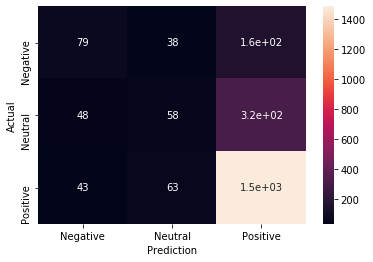

In [16]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.xticks([0.5,1.5,2.5],['Negative', 'Neutral', 'Positive'])
plt.yticks([0.5,1.5,2.5],['Negative', 'Neutral', 'Positive'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.savefig('conf_metric.jpg')

--- Use oversampling and pca

In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, prob)

0.7349348676034686

In [64]:
logreg.fit(oversampled_train_x, oversampled_train_y)

LogisticRegression(C=4.281)

In [73]:
logreg.predict(x_test_pca).shape

(2291,)

In [74]:
print(classification_report(y_test, logreg.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.25      0.68      0.37       277
           0       0.36      0.06      0.10       423
           1       0.80      0.74      0.77      1591

    accuracy                           0.61      2291
   macro avg       0.47      0.49      0.41      2291
weighted avg       0.65      0.61      0.60      2291



In [31]:
joblib.dump(logreg, r'D:\FinalProject\DataBase\Output\model')

[&#39;D:\\FinalProject\\DataBase\\Output\\model&#39;]

# Boosting

In [61]:
from xgboost import XGBClassifier

In [85]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 2, n_jobs = -1)

#learning_rate = 0.5, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.87 test: 0.69
#learning_rate = 0.25, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.80 test: 0.71 dis
#learning_rate = 0.1, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.74 test: 0.71
#learning_rate = 0.01, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.68 test: 0.70
#learning_rate = 0.005, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.67 test: 0.69

#learning_rate = 0.25, n_estimators = 500, max_depth = 1, n_jobs = -1 | train: 0.71 test: 0.70 dis
#learning_rate = 0.25, n_estimators = 100, max_depth = 1, n_jobs = -1 | train: 0.68 test: 0.70

#learning_rate = 0.25, n_estimators = 500, max_depth = 2, n_jobs = -1 | train: 0.76 test: 0.71

In [86]:
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
print(classification_report(y_train, xgboost.predict(x_train)))

              precision    recall  f1-score   support

          -1       0.85      0.36      0.51       681
           0       0.85      0.23      0.36      1064
           1       0.75      0.99      0.85      3598

    accuracy                           0.76      5343
   macro avg       0.81      0.53      0.57      5343
weighted avg       0.78      0.76      0.71      5343



In [88]:
print(classification_report(y_test, xgboost.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.58      0.22      0.32       277
           0       0.36      0.09      0.14       423
           1       0.73      0.96      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.56      0.42      0.43      2291
weighted avg       0.65      0.71      0.64      2291



----

In [13]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 2, n_jobs = -1, early_stopping_rounds = 50)

In [7]:
xgboost.fit(x_train, y_train)

[22:20:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
print(classification_report(y_train, xgboost.predict(x_train)))

              precision    recall  f1-score   support

          -1       0.85      0.36      0.51       681
           0       0.85      0.23      0.36      1064
           1       0.75      0.99      0.85      3598

    accuracy                           0.76      5343
   macro avg       0.81      0.53      0.57      5343
weighted avg       0.78      0.76      0.71      5343



In [ ]:
print(classification_report(y_test, xgboost.predict(x_test)))

---

In [62]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 2, n_jobs = -1)
xgboost.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective=&#39;multi:softprob&#39;, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)

In [63]:
print(classification_report(y_train, xgboost.predict(x_train_pca)))
print(classification_report(y_test, xgboost.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.90      0.50      0.65       681
           0       0.90      0.41      0.56      1064
           1       0.80      0.99      0.88      3598

    accuracy                           0.81      5343
   macro avg       0.87      0.63      0.70      5343
weighted avg       0.83      0.81      0.79      5343

              precision    recall  f1-score   support

          -1       0.44      0.20      0.28       277
           0       0.38      0.15      0.21       423
           1       0.74      0.93      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.52      0.43      0.44      2291
weighted avg       0.64      0.70      0.65      2291



In [70]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, n_jobs = -1)
xgboost.fit(x_train_pca, y_train)
print(classification_report(y_train, xgboost.predict(x_train_pca)))
print(classification_report(y_test, xgboost.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       681
           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00      3598

    accuracy                           1.00      5343
   macro avg       1.00      1.00      1.00      5343
weighted avg       1.00      1.00      1.00      5343

              precision    recall  f1-score   support

          -1       0.45      0.18      0.26       277
           0       0.37      0.14      0.20       423
           1       0.74      0.95      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.52      0.42      0.43      2291
weighted avg       0.64      0.70      0.65      2291



In [72]:
xgboost = XGBClassifier(learning_rate = 0.9, n_estimators = 500, max_depth = 1, n_jobs = -1)
xgboost.fit(x_train_pca, y_train)
print(classification_report(y_train, xgboost.predict(x_train_pca)))
print(classification_report(y_test, xgboost.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.86      0.60      0.71       681
           0       0.83      0.51      0.64      1064
           1       0.83      0.97      0.89      3598

    accuracy                           0.83      5343
   macro avg       0.84      0.70      0.75      5343
weighted avg       0.83      0.83      0.82      5343

              precision    recall  f1-score   support

          -1       0.39      0.25      0.31       277
           0       0.32      0.20      0.24       423
           1       0.76      0.88      0.82      1591

    accuracy                           0.68      2291
   macro avg       0.49      0.44      0.46      2291
weighted avg       0.63      0.68      0.65      2291



In [74]:
xgboost = XGBClassifier(learning_rate = 0.9, n_estimators = 100, max_depth = 1, n_jobs = -1)
xgboost.fit(x_train_pca, y_train)
print(classification_report(y_train, xgboost.predict(x_train_pca)))
print(classification_report(y_test, xgboost.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.70      0.33      0.45       681
           0       0.73      0.24      0.36      1064
           1       0.75      0.97      0.85      3598

    accuracy                           0.75      5343
   macro avg       0.73      0.52      0.55      5343
weighted avg       0.74      0.75      0.70      5343

              precision    recall  f1-score   support

          -1       0.46      0.21      0.29       277
           0       0.37      0.13      0.20       423
           1       0.74      0.94      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.52      0.43      0.44      2291
weighted avg       0.64      0.70      0.64      2291



In [65]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 2, n_jobs = -1, early_stopping_rounds = 50)
xgboost.fit(x_train_pca, y_train)

[00:08:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
              gamma=0, gpu_id=-1, importance_type=&#39;gain&#39;,
              interaction_constraints=&#39;&#39;, learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints=&#39;()&#39;, n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, objective=&#39;multi:softprob&#39;, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)

In [66]:
print(classification_report(y_train, xgboost.predict(x_train_pca)))
print(classification_report(y_test, xgboost.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.90      0.50      0.65       681
           0       0.90      0.41      0.56      1064
           1       0.80      0.99      0.88      3598

    accuracy                           0.81      5343
   macro avg       0.87      0.63      0.70      5343
weighted avg       0.83      0.81      0.79      5343

              precision    recall  f1-score   support

          -1       0.44      0.20      0.28       277
           0       0.38      0.15      0.21       423
           1       0.74      0.93      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.52      0.43      0.44      2291
weighted avg       0.64      0.70      0.65      2291

